<h1>Script licență</h1>

Acest script are ca scop preluarea imaginii cu actul de identitate ales, folosind aplicația desktop, pentru a fi procesat, detecția și localizarea cifrelor din CNP, preluarea fiecărei cifre și crearea unui dataset folosit pentru a prezice aceste cifre folosind rețeaua neuronală convoluțională, salvarea rezultatelor în urma aplicării convoluțiilor și max-pooling pe fiecare dintre cele 13 cifre, convertirea pixelilor din zecimal în fixed point și crearea unui fișier de input care ar urma să fie trimis la placa de dezvoltare.  

In [290]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [291]:
import pytesseract
import numpy as np
import cv2
import matplotlib as plt
from PIL import Image

Script-ul se va rula în întregime, folosind comanda "Run All". Execuția script-ului se va opri pentru a fi selectată imaginea care se dorește a fi procesată din aplicația desktop. Odată selectată imaginea, aceasta va fi salvată în folderul chosen_image cu denumirea buletin.jpg. În momentul în care este salvată, execuția scriptului va continua.

In [292]:
import os.path
import time

file_path = "C:\\Users\\Marius\\Documents\\Embarcadero\\Studio\\PC2Basys3\\Win32\\Debug\\chosen_image\\buletin.jpg"
ok = 0

while not os.path.exists(file_path):
    time.sleep(1)

if os.path.isfile(file_path):
    print('exists')
    ok = 1
else:
    print('does not exit')
    ok = 0

exists


In [293]:
print(ok)

1


În momentul în care este aleasă imaginea cu buletinul, vor fi salvați parametrii corespunzători imaginii în fișierul config.txt. Parametrii imaginii sunt fx și fy (coeficienții cu care se va face resize la imagine pentru a fi detectate cu ușurință cifrele din CNP) și threshold-ul pentru care se face binarizarea imaginilor cu cifrele.

In [294]:
myfile = open('C:\\Users\\Marius\\Documents\\Embarcadero\\Studio\\PC2Basys3\\Win32\\Debug\\chosen_image\\config.txt')   # Windows
mytxt = myfile.read()
myfile.close()

In [295]:
print(mytxt)

2
2
140



In [296]:
fx_val = float(mytxt.splitlines()[0])
fy_val = float(mytxt.splitlines()[1])
threshold = int(mytxt.splitlines()[2])

In [297]:
img = cv2.imread(file_path)

In [298]:
img.shape

(293, 482, 3)

buletinBeianAdriana.jpg fx = 2.5 fy = 2.5 threshold = 140 rezultat: 13/13 <br>
buletinBeianDragos.jpg fx = 2.0 fy = 2.0 threshold = 140 rezultat 10/13 (3 greseli la 7 in loc de 1) <br>
buletinTatarLiliana.jpg fx = 2.0 fy = 2.0 threshold = 140 rezultat: 10/13 (2 greseli la 7 in loc de 1) <br>
buletinStoicaMarius.jpg fx = 1.5 fy = 1.5 threshold = 120 rezultat 8/13 (2 greseli la 7 in loc de 1) <br> 
buletinKissSandor.jpg fx = 1.2 fy = 1.2 threshold = 120 rezultat 8/13 (3 greseli la 7 in loc de 1) <br>


Imaginea a fost redimensionată, având ca și parametrii fx și fy, preluați din fișierul de configurare. Parametrii fx și fy au valori diferite pentru imagini diferite. Valorile vor fi stabilite prin încercări multiple, de la 0.5, fiind incrementat cu câte 0.5, uneori ajungând chiar până la 3.0. 

In [299]:
img = cv2.resize(img,None,fx = fx_val,fy = fy_val)

In [300]:
img.shape

(586, 964, 3)

În cele ce urmează sunt implementate funcții de preprocesare a imaginii, înainte de a aplica algoritmul OCR.

In [301]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)


Funcția get_grayscale face ca o imagine RGB cu 3 canale de culoare, să devină o imagine grayscale, cu un singur canal de culoare. Funcția thresholding preia imaginea grayscale și o binarizează, folosind un threshold. Funcția opening are rolul de a elimina zgomotele din imagine. Funcția canny are rolul de a detecta muchiile.

In [302]:
gray = get_grayscale(img)
canny = canny(gray)

În folderul Tesseract-OCR a fost instalată aplicația tesseract. Pentru a putea fi folosit tesseract în aplicația de față, este necesară încărcarea executabilului din folderul Tesseract-OCR.

In [303]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [304]:
img.shape
hImage = img.shape[0]
wImage = img.shape[1]

In [305]:
hImage,wImage

(586, 964)

Folosind funcția image_to_boxes, aplicată pe imaginea canny, au fost detectate multe dintre caracterele din imagine.

In [306]:
boxes = pytesseract.image_to_boxes(canny)

In [307]:
print(boxes)

R 7 542 35 577 0
O 37 541 71 577 0
U 75 541 102 576 0
M 106 540 141 575 0
A 143 540 174 575 0
N 177 539 205 575 0
I 210 539 218 574 0
E 223 538 249 574 0
| 288 531 289 579 0
} 288 531 301 579 0
? 314 556 324 575 0
. 339 534 347 546 0
0 350 534 382 579 0
j 400 529 429 586 0
u 417 522 449 565 0
s 465 527 507 576 0
| 564 515 600 586 0
/ 635 569 665 584 0
| 700 515 724 586 0
R 738 532 768 567 0
O 771 531 805 567 0
M 808 530 844 566 0
A 844 530 877 565 0
N 880 529 910 564 0
I 914 529 923 564 0
A 925 528 956 563 0
G 478 489 494 507 0
A 497 489 511 506 0
R 515 489 529 506 0
T 530 490 546 506 0
E 549 489 561 506 0
O 575 488 589 505 0
E 591 487 605 505 0
I 617 486 641 506 0
D 635 486 646 506 0
E 645 487 659 504 0
N 662 487 677 504 0
T 680 487 694 504 0
T 705 486 720 503 0
A 720 487 734 505 0
T 736 486 752 502 0
E 754 485 768 503 0
o 849 481 863 497 0
e 865 481 887 497 0
r 890 480 943 497 0
T 920 470 928 513 0
y 927 470 946 513 0
o 291 475 305 491 0
n 306 475 316 490 0
e 315 475 332 510 0
e 331 

Caracterele au fost introduse într-un array unidimensional.

In [308]:
l = []
for b in boxes.splitlines():
    b = b.split(' ')
    l.append(b[0])

In [309]:
print(l)

['R', 'O', 'U', 'M', 'A', 'N', 'I', 'E', '|', '}', '?', '.', '0', 'j', 'u', 's', '|', '/', '|', 'R', 'O', 'M', 'A', 'N', 'I', 'A', 'G', 'A', 'R', 'T', 'E', 'O', 'E', 'I', 'D', 'E', 'N', 'T', 'T', 'A', 'T', 'E', 'o', 'e', 'r', 'T', 'y', 'o', 'n', 'e', 'e', 't', 'r', 'e', 'c', 'a', 'p', 'a', '|', 'M', 'S', 'u', '-', '7', 'S', 'P', 'B', 'O', '1', 'a', 'e', 'n', '2', '9', '5', '1', '1', '0', '2', '2', '6', '0', '0', '6', '8', ',', 'K', 'O', 'P', 'I', 'O', 'i', 't', 'a', 'e', 'S', 'a', 'i', ')', 'P', 'r', 'o', 'n', 'u', 'm', 'o', 'P', 'r', 'e', 'n', 'o', 'a', 'n', 'F', 'i', 'r', 's', 't', 'm', 'b', 'a', 'r', 'g', '|', 'L', 'I', 'L', 'I', 'A', 'N', 'N', 'A', 'C', 'C', 'G', 'A', 'B', 'R', 'I', 'E', 'L', 'A', 'L', 'j', 'O', 'n', 'l', 'e', 'i', 'N', 'o', 'v', 'e', 'm', 'a', 'M', 'a', 'r', 'n', 'i', 'e', 'I', 'H', 't', 'e', ',', 'S', 'a', 'H', '0', 'R', 'e', 'm', 'a', 'n', 'd', '/', 'R', 'O', 'U', 'L', 'a', 's', 'n', 'a', 'g', 't', 'o', 'r', 'o', 'j', 'U', 'i', 'o', 'y', 'd', 'e', 'a', 'a', 'l',

In [310]:
l = []
for b in boxes.splitlines():
    b = b.split(' ')
    l.append(b[0])

In [311]:
print(l)

['R', 'O', 'U', 'M', 'A', 'N', 'I', 'E', '|', '}', '?', '.', '0', 'j', 'u', 's', '|', '/', '|', 'R', 'O', 'M', 'A', 'N', 'I', 'A', 'G', 'A', 'R', 'T', 'E', 'O', 'E', 'I', 'D', 'E', 'N', 'T', 'T', 'A', 'T', 'E', 'o', 'e', 'r', 'T', 'y', 'o', 'n', 'e', 'e', 't', 'r', 'e', 'c', 'a', 'p', 'a', '|', 'M', 'S', 'u', '-', '7', 'S', 'P', 'B', 'O', '1', 'a', 'e', 'n', '2', '9', '5', '1', '1', '0', '2', '2', '6', '0', '0', '6', '8', ',', 'K', 'O', 'P', 'I', 'O', 'i', 't', 'a', 'e', 'S', 'a', 'i', ')', 'P', 'r', 'o', 'n', 'u', 'm', 'o', 'P', 'r', 'e', 'n', 'o', 'a', 'n', 'F', 'i', 'r', 's', 't', 'm', 'b', 'a', 'r', 'g', '|', 'L', 'I', 'L', 'I', 'A', 'N', 'N', 'A', 'C', 'C', 'G', 'A', 'B', 'R', 'I', 'E', 'L', 'A', 'L', 'j', 'O', 'n', 'l', 'e', 'i', 'N', 'o', 'v', 'e', 'm', 'a', 'M', 'a', 'r', 'n', 'i', 'e', 'I', 'H', 't', 'e', ',', 'S', 'a', 'H', '0', 'R', 'e', 'm', 'a', 'n', 'd', '/', 'R', 'O', 'U', 'L', 'a', 's', 'n', 'a', 'g', 't', 'o', 'r', 'o', 'j', 'U', 'i', 'o', 'y', 'd', 'e', 'a', 'a', 'l',

Algoritmul de mai jos are rolul de a detecta codul numeric personal din buletin. Array-ul unidimensional de caractere este parcurs. Dacă se ajunge la un caracter numeric, se marchează începutul unui șir de numere, folosind variabila okLeft, și se salvează indexul poziției de început, în variabila left. Dacă șirul de numere citit aparține CNP-ului, vor fi citite 13 numere, urmate de un caracter care nu este numeric. Se salvează și indexul poziției ultimei cifre care aparține CNP-ului.

In [312]:
cnt = 0
maxx = 0
count = 0
okLeft = 0
maxLeft = maxRight = 0
for i in l:
    if i.isnumeric() :
        if okLeft == 0:
            left = cnt
            okLeft = 1
        count = count + 1
    else :
        if count > maxx:
            maxx = count
            maxLeft = left
            maxRight = cnt - 1
            if count == 13:
                break
        count = 0
        okLeft = 0
    cnt = cnt + 1          
print(maxLeft,maxRight)

72 84


In [313]:
cnt = 0
for i in l:
    if cnt >= maxLeft and cnt <= maxRight:
        print(i)
    cnt = cnt + 1

2
9
5
1
1
0
2
2
6
0
0
6
8


Cifrele din CNP au fost detectate și localizate. Pentru fiecare cifră, se preiau coordonatele x,y, width-ul și height-ul. Fiecare cifră va fi încadrată într-o imagine de 18X18. Scopul este crearea unei imagini de 28X28, astfel încât cifra șă fie cât mai mult centrată în imagine. Dacă cifra nu este centrată în imagine, clasificarea va fi greu de realizat. În jurul celor 18X18 pixeli cu cifra vor fi introduși pixeli negri pentru a umple imaginea de 28X28. Cifrele detectate au culoarea negru pe fundal alb. A fost necesară modificarea imaginii într-una cu cifre albe pe fundal negru, de aici scăderea fiecărei valori din imagine cu 255. Cele 13 imagini cu cifrele din serie vor fi salvate pentru a fi utilizate în rețeaua neuronală convoluțională.  

In [314]:
cnt = 0
count = 0

width = 18
height = 18

dim = (width,height)

cnp = ''

print(hImage)
for b in boxes.splitlines():
    b = b.split(' ')
    if cnt >= maxLeft and cnt <= maxRight:
        x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
        p1 = x
        p2 = hImage - y
        p3 = w
        p4 = hImage - h
        roi = img[hImage - h:hImage - y,x:w]
        resized = cv2.resize(roi, dim, interpolation = cv2.INTER_AREA)
        resized = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        resized = 255 - resized
        canvas = np.zeros((28,28),dtype=int)
        canvas[5:23, 5:23] = resized
        name = "cnp" + str(count) + ".jpg"
        cv2.imwrite(name,canvas)
        cnp += b[0]
        #image = cv2.rectangle(img,(p1,p2),(p3,p4),(255,0,0),1)
        #cv2.putText(img,b[0],(x,hImage - y + 25),cv2.FONT_HERSHEY_COMPLEX,1,(50,255,255),2)
        #img[hImage - h:hImage - y,x:w] = cv2.blur(img[hImage - h:hImage - y,x:w], (23, 23))
        print(b)
        count = count + 1
    cnt = cnt + 1
#cv2.rectangle(img,(p1f,p2f),(p3f,p4f),(255,0,0),-1)
#cv2.imshow('Result',img)
# img = cv2.resize(img,None,fx = 0.5,fy = 0.5)
# cv2.imwrite('C:\\Users\\Marius\\Documents\\Embarcadero\\Studio\\PC2Basys3\\Win32\\Debug\\edited_image\\edited.jpg', img)
# cv2.waitKey(0)  

586
['2', '326', '434', '343', '461', '0']
['9', '344', '433', '361', '461', '0']
['5', '361', '434', '377', '459', '0']
['1', '378', '433', '389', '458', '0']
['1', '393', '434', '403', '459', '0']
['0', '407', '433', '425', '459', '0']
['2', '424', '433', '441', '459', '0']
['2', '440', '432', '458', '459', '0']
['6', '459', '431', '476', '458', '0']
['0', '477', '432', '494', '459', '0']
['0', '496', '435', '510', '459', '0']
['6', '514', '431', '530', '458', '0']
['8', '532', '431', '550', '457', '0']


In [315]:
start_point = (0, 0) 
end_point = (370, 100) 
  
# Blue color in BGR 
color = (0, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(img, start_point, end_point, color, -1) 

In [316]:
# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (10, 50)
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 255, 255)
  
# Line thickness of 2 px
thickness = 2
   
# Using cv2.putText() method
image = cv2.putText(image, 'CNP ' + cnp, org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)

In [317]:
img = cv2.resize(image,None,fx = 0.5,fy = 0.5)
cv2.imwrite('C:\\Users\\Marius\\Documents\\Embarcadero\\Studio\\PC2Basys3\\Win32\\Debug\\edited_image\\edited.jpg', img)
cv2.waitKey(0)  

-1

Threshold-ul poate fi o problema: la buletinMama.jpg este 140, la lili este 120

Cele 13 imagini cu cifrele CNP-ului sunt citite din folder și adăugate în array-ul test_arr1. Imaginile sunt binarizate, folosind threshold-ul din fișierul de configurare. Fiecare imagine are o altă valoare de threshold.

In [318]:
import cv2

count = 0
test1 = []

while (count != 13):
    name = "cnp" + str(count) + ".jpg"
    img = cv2.imread(name,0)
    test1.append(img)
    count = count + 1
    
test_arr1 = np.array(test1)
test_arr1 = np.where(test_arr1 < threshold, 0, test_arr1)
print(test_arr1)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Imaginile au valori cuprinse între 0 și 255. Pentru a fi introduse în rețeaua neuronală convoluțională, valorile trebuie să fie normalizate între 0 și 1.

In [319]:
test_arr1 = test_arr1/255
print(test_arr1)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Array-ul test_arr1 va avea 13 imagini cu dimensiunea de 28X28 pixeli normalizați.

In [320]:
print(test_arr1.shape)

(13, 28, 28)


Se face o redimensionare a array-ul test_arr1, pentru a avea o reprezentare pe canale de culoare, chiar dacă are un singur canal, fiind o imagine grayscale. Această redimensionare este necesară înainte de a realiza predicția cifrelor folosind rețeua neuronală convoluțională.

In [321]:
test_arr1 = test_arr1.reshape(-1,28,28,1)
test_arr1.shape

(13, 28, 28, 1)

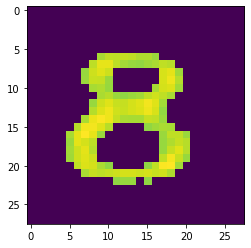

In [322]:
import matplotlib.pyplot as plt
plt.imshow(test_arr1[12])

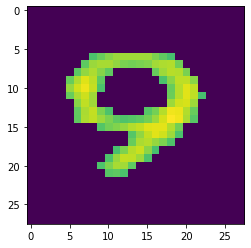

In [323]:
plt.imshow(test_arr1[1])

In [324]:
import matplotlib

test_arr1 = test_arr1.reshape(-1,28,28)
count = 0

for i in range(13):
    print(count)
    name = "test_arr" + str(count) + ".jpg"
    matplotlib.image.imsave(name, test_arr1[i])
    count = count + 1
test_arr1 = test_arr1.reshape(-1,28,28,1)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [325]:
print(test_arr1[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

Modelul rețelei neuronale a fost salvat și este încărcat din fișirul 'my_model'.

In [326]:
from tensorflow import keras
model = keras.models.load_model('my_model2')

In [327]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5

Se va face o predicție a imaginilor din CNP apelând metoda predict, având ca și parametru dataset-ul de imagini cu cele 13 cifre ale CNP-ului. 

In [328]:
y_pred = model.predict(test_arr1)

In [329]:
y_pred[0]

array([9.2276459e-06, 6.0050108e-05, 1.9017863e-01, 1.3785511e-02,
       6.7433393e-07, 3.7488658e-07, 5.6686622e-07, 2.4601817e-04,
       5.7895780e-03, 1.2942990e-05], dtype=float32)

In [330]:
np.argmax(y_pred[12])

8

Rezultatele predicției, adică valorile maxime ale y_pred, sunt salvate și scrise în fișierul resulted_cnp.txt.

In [331]:
resulted_cnp = ''
for i in range(13):
    resulted_cnp = resulted_cnp + (str(np.argmax(y_pred[i])))
print(resulted_cnp)

2957702260068


In [332]:
text_file = open("E:\\Licenta\\Script licenta\\resulted_cnp.txt", "w")
text_file.write("%s" % resulted_cnp)
text_file.close()

In [333]:
num_layer = 5 # Dense(1) layer
layer = model.layers[num_layer]

În intermediate_output sunt stocate rezultatele de după aplicarea layer-elor de convoluție și max-pooling pe cele 13 imagini cu cifrele CNP-ului, fiecare având dimensiunea de 576. Fiecare dintre cele 13 va fi, pe rând, o intrare a rețelei neuronale artificiale din VHDL. 

In [334]:
from keras.models import Model

layer_name = 'flatten'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(test_arr1)

In [335]:
print(intermediate_output.shape)

(13, 576)


In [336]:
print(intermediate_output[0],len(intermediate_output[0]))

[0.0000000e+00 0.0000000e+00 0.0000000e+00 3.9118117e-01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.5877576e+00 2.9269421e-01 5.2239823e-01 2.0599081e-01
 0.0000000e+00 0.0000000e+00 2.9726326e-01 0.0000000e+00 1.3834760e-02
 0.0000000e+00 2.1514297e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 4.8462570e-01 3.4495912e+00 1.3906932e+00 0.0000000e+00 0.0000000e+00
 1.0813909e+00 3.1276181e-01 0.0000000e+00 0.0000000e+00 1.8278196e+00
 2.8078442e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6516967e-01
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 6.9180650e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 6.8745488e-01 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6078289e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 4.4198906e-01 0.0000000e+00 0.0000000e+00
 0.000

In [337]:
input1 = intermediate_output[0]

In [338]:
print(input1)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 3.9118117e-01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.5877576e+00 2.9269421e-01 5.2239823e-01 2.0599081e-01
 0.0000000e+00 0.0000000e+00 2.9726326e-01 0.0000000e+00 1.3834760e-02
 0.0000000e+00 2.1514297e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 4.8462570e-01 3.4495912e+00 1.3906932e+00 0.0000000e+00 0.0000000e+00
 1.0813909e+00 3.1276181e-01 0.0000000e+00 0.0000000e+00 1.8278196e+00
 2.8078442e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6516967e-01
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 6.9180650e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 6.8745488e-01 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6078289e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 4.4198906e-01 0.0000000e+00 0.0000000e+00
 0.000

In [339]:
len(intermediate_output[0])

576

Valorile din intermediate_output au fost salvate în fișierul inputsAll.

In [340]:
s = ''
arrInputs = []
for i in range(13):
    for j in range(576):
        s += str(intermediate_output[i][j])
        arrInputs.append(intermediate_output[i][j])
        s += ' '

In [341]:
print(s)

0.0 0.0 0.0 0.39118117 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.5877576 0.2926942 0.52239823 0.2059908 0.0 0.0 0.29726326 0.0 0.01383476 0.0 0.21514297 0.0 0.0 0.0 0.4846257 3.4495912 1.3906932 0.0 0.0 1.0813909 0.3127618 0.0 0.0 1.8278196 2.8078442 0.0 0.0 0.0 0.16516967 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.6918065 0.0 0.0 0.0 0.0 0.0 0.6874549 0.0 0.0 0.0 0.0 0.0 1.6078289 0.0 0.0 0.0 0.44198906 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.13819833 0.23306228 0.18788373 0.0 0.0 1.2207425 0.0 0.0 0.0 0.6029816 0.0 0.0 0.0 0.13875717 4.025763 1.1260712 0.0 0.3127883 3.899034 0.0 0.0 0.0 0.3539239 1.5758682 0.0 0.0 0.0 2.9375753 1.2029018 0.0 0.0 0.94710165 0.0 0.0 0.0 0.0 0.0 0.0 0.20304318 1.2447608 0.0 0.0 0.0 0.0 1.3104494 1.3606477 0.0 0.0 0.40518993 0.0 0.56708753 0.8213547 0.0 0.0 0.0 0.6090926 0.0 0.0 0.0 0.0 0.0 1.3244175 0.0 0.0 0.1348334 0.0 0.0 0.0 0.0 0.55130357 0.0 0.0 0.0 1.7492789 0.0 0.0 0.0 0.0 1.3026749 0.2689959 0.23015699 0.0 3.0155766 0.0 0.6145033 0.0 0.0 0.15471847 0.0 0.0 0.

In [342]:
print(arrInputs)

[0.0, 0.0, 0.0, 0.39118117, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5877576, 0.2926942, 0.52239823, 0.2059908, 0.0, 0.0, 0.29726326, 0.0, 0.01383476, 0.0, 0.21514297, 0.0, 0.0, 0.0, 0.4846257, 3.4495912, 1.3906932, 0.0, 0.0, 1.0813909, 0.3127618, 0.0, 0.0, 1.8278196, 2.8078442, 0.0, 0.0, 0.0, 0.16516967, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6918065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6874549, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6078289, 0.0, 0.0, 0.0, 0.44198906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13819833, 0.23306228, 0.18788373, 0.0, 0.0, 1.2207425, 0.0, 0.0, 0.0, 0.6029816, 0.0, 0.0, 0.0, 0.13875717, 4.025763, 1.1260712, 0.0, 0.3127883, 3.899034, 0.0, 0.0, 0.0, 0.3539239, 1.5758682, 0.0, 0.0, 0.0, 2.9375753, 1.2029018, 0.0, 0.0, 0.94710165, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20304318, 1.2447608, 0.0, 0.0, 0.0, 0.0, 1.3104494, 1.3606477, 0.0, 0.0, 0.40518993, 0.0, 0.56708753, 0.8213547, 0.0, 0.0, 0.0, 0.6090926, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3244175, 0.0, 0.0, 0.1348334, 0.0, 0.0, 0

In [343]:
text_file = open("inputs/inputsAll.txt", "w")
text_file.write("%s" % s)
text_file.close()

In [344]:
weights, biases = model.layers[6].get_weights()

In [345]:
weights = weights.flatten()
biases = biases.flatten()

In [346]:
outputTestImage = []
maxValues = []
minValues = []
beforeSigmoid = []
for j in range(10):
    countW = 0
    arrW = []
    valMax = 0
    valMin = 0
    for i in range(len(weights)):
        if i == (countW * 10 + j):
            arrW.append(weights[i])
            countW += 1
    
    suma = 0
    for i in range(len(arrW)):
        prod = input1[i]*arrW[i]
        suma += input1[i]*arrW[i]
        if (prod > valMax):
            valMax = prod
        if (prod < valMin):
            valMin = prod
        if (suma > valMax):
            valMax = suma
        if (suma < valMin):
            valMin = suma
    suma += biases[j]
    maxValues.append(valMax)
    minValues.append(valMin)
    beforeSigmoid.append(suma)
    z = 1/(1 + np.exp(-suma))
    outputTestImage.append(z)
print(outputTestImage)
print(maxValues)
print(minValues)
print(beforeSigmoid)

[9.227561090456354e-06, 6.004642915416248e-05, 0.1901786339155844, 0.013785533173774268, 6.743335859309626e-07, 3.7488555644179e-07, 5.668648828510346e-07, 0.00024604408695039784, 0.005789557081660936, 1.2942808192908509e-05]
[0.270941, 0.5731998, 0.7561181883793324, 0.37477258, 0.21719946, 0.43841383, 0.31852198, 1.5003306092694402, 0.45469838, 0.3870067]
[-11.52370332690407, -9.794128139605164, -1.3747946516305092, -4.537970285746269, -14.170656918537134, -14.750796566906502, -14.296774372354776, -8.351482747948467, -5.562212241748057, -11.1658143698005]
[-11.593306553982984, -9.72033242751786, -1.448849878674082, -4.270254121394828, -14.209540239524358, -14.796644665490021, -14.38314429660204, -8.309753748482763, -5.145893105909636, -11.254957333090715]


Se va folosi algoritmul de conversie a numerelor din virgulă mobilă în fixed point. 

In [347]:
def complement(x):
    c1 = ''
    for i in x:
        if (i == '0') :
            c1 = c1 + '1' 
        else :
            c1 = c1 + '0'
    return c1

In [348]:
def convInt(pi):
    if (pi>=0):
        pib = "{0:08b}".format(pi)
    else :
        pipoz = -pi;
        pib = "{0:08b}".format(pipoz)
        c1 = complement(pib)
        bc1 = bin(int(c1, 2))
        final = bin(int(bc1,2) + int('00000001',2))
        pib = final[2:]
        pib = str(pib).zfill(8)
    return pib

In [349]:
def convFrac(x):
    double = x
    arr = []
    bits = []
    contor = 0
    n = 8
    s = ''
    while(contor != n):
        double = double * 2
        if(double >= 1):
            bits.append('1')
            double = double - 1
        else :
            bits.append('0')
        double = float("{:.8f}".format(double))
        arr.append(double)
        contor = contor + 1
    for i in bits:
        s += i
    return s

In [350]:
def convert(x):
    pi = int(x)
    pf = float("{:.8f}".format(x - int(x)))
    if(x<0):
        if pf != 0.0:
            pi = pi - 1
            pf = -pf
            pf = 1 - pf
            pf = float("{:.8f}".format(pf))
    bi = convInt(pi)
    bf = convFrac(pf)
    s = bi + bf
    return s

In [351]:
convert(0.0827295301714912)

'0000000000010101'

In [352]:
pixels = ''
with open ("inputs\inputsAll.txt", "r") as myfile:
    pixels = myfile.readlines()

In [353]:
str1 = ''.join(pixels)

In [354]:
pixels_split = str1.split()

In [355]:
print(pixels_split)

['0.0', '0.0', '0.0', '0.39118117', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.5877576', '0.2926942', '0.52239823', '0.2059908', '0.0', '0.0', '0.29726326', '0.0', '0.01383476', '0.0', '0.21514297', '0.0', '0.0', '0.0', '0.4846257', '3.4495912', '1.3906932', '0.0', '0.0', '1.0813909', '0.3127618', '0.0', '0.0', '1.8278196', '2.8078442', '0.0', '0.0', '0.0', '0.16516967', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.6918065', '0.0', '0.0', '0.0', '0.0', '0.0', '0.6874549', '0.0', '0.0', '0.0', '0.0', '0.0', '1.6078289', '0.0', '0.0', '0.0', '0.44198906', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.13819833', '0.23306228', '0.18788373', '0.0', '0.0', '1.2207425', '0.0', '0.0', '0.0', '0.6029816', '0.0', '0.0', '0.0', '0.13875717', '4.025763', '1.1260712', '0.0', '0.3127883', '3.899034', '0.0', '0.0', '0.0', '0.3539239', '1.5758682', '0.0', '0.0', '0.0', '2.9375753', '1.2029018', '0.0', '0.0', '0.94710165', '0.0', '0.0', '0.0', '0

In [356]:
len(pixels_split)

7488

Valorile citite din fișierul inputsAll.txt sunt convertite din virgulă mobilă în fixed point representation, și salvate în fișierul InputsAllVHDL.txt.

In [357]:
conv_pixels = []
count = 0
for i in pixels_split:
    val = float(i)
    conv = convert(val)
    conv_pixels.append(conv)

In [358]:
print(conv_pixels,len(conv_pixels))

['0000000000000000', '0000000000000000', '0000000000000000', '0000000001100100', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000', '0000000110010110', '0000000001001010', '0000000010000101', '0000000000110100', '0000000000000000', '0000000000000000', '0000000001001100', '0000000000000000', '0000000000000011', '0000000000000000', '0000000000110111', '0000000000000000', '0000000000000000', '0000000000000000', '0000000001111100', '0000001101110011', '0000000101100100', '0000000000000000', '0000000000000000', '0000000100010100', '0000000001010000', '0000000000000000', '0000000000000000', '0000000111010011', '0000001011001110', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000101010', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000', '0000000000000000',

In [359]:
outputString = ''
noChar = 0
for i in conv_pixels:
    outputString += i
    outputString += ' '
    noChar += 1
print(outputString)

0000000000000000 0000000000000000 0000000000000000 0000000001100100 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000110010110 0000000001001010 0000000010000101 0000000000110100 0000000000000000 0000000000000000 0000000001001100 0000000000000000 0000000000000011 0000000000000000 0000000000110111 0000000000000000 0000000000000000 0000000000000000 0000000001111100 0000001101110011 0000000101100100 0000000000000000 0000000000000000 0000000100010100 0000000001010000 0000000000000000 0000000000000000 0000000111010011 0000001011001110 0000000000000000 0000000000000000 0000000000000000 0000000000101010 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000010110001 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000000000000 0000000010101111 00000000000000

In [360]:
print(noChar)

7488


In [361]:
text_file = open("E:\HTerm\InputsAllVHDL.txt", "w")
text_file.write("%s" % outputString)
text_file.close()